In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [115]:
import scipy.stats as stats

In [102]:
# Read in the raw data and look at it.
imprisonment_rates_file = "../imprisonment_rates_of_18_24_yos_2000_2012.csv"

imprisionment_rates_df = pd.read_csv(imprisonment_rates_file)
imprisionment_rates_df
imprisionment_rates_df.head(5)

,Characteristic,Sex,Race/ethnicity,Year,"Rate per 100,000",Count
0,Total,NaN,NaN,2000,791,218896
1,Total,NaN,NaN,2001,777,219439
2,Total,NaN,NaN,2002,766,220072
3,Total,NaN,NaN,2003,750,218436
4,Total,NaN,NaN,2004,707,207416


In [103]:
# Race/Ethnicity a duplicate of Characteristic, drop it.

imprisonment_df = imprisionment_rates_df
imprisonment_df = imprisonment_df.drop(['Race/ethnicity'], axis=1)


imprisonment_df.head(50)

,Characteristic,Sex,Year,"Rate per 100,000",Count
0,Total,NaN,2000,791,218896
1,Total,NaN,2001,777,219439
2,Total,NaN,2002,766,220072
3,Total,NaN,2003,750,218436
4,Total,NaN,2004,707,207416
5,Total,NaN,2005,680,200050
6,Total,NaN,2006,663,196234
7,Total,NaN,2007,662,197731
8,Total,NaN,2008,658,199105
9,Total,NaN,2009,660,201325


In [104]:
# Fill in NaNs for Sex column.  NaNs are both.
imprisonment_df['Sex'] = imprisonment_df['Sex'].fillna("MF")
imprisonment_df.head()

,Characteristic,Sex,Year,"Rate per 100,000",Count
0,Total,MF,2000,791,218896
1,Total,MF,2001,777,219439
2,Total,MF,2002,766,220072
3,Total,MF,2003,750,218436
4,Total,MF,2004,707,207416


In [105]:
# This gets all races and both sexs
try:
    output_data_file = "Cleaned_Imprisonment_Rates.csv"
    imprisonment_df.to_csv(output_data_file)
except:
    print(f"Unable to write file: {output_data_file}")

In [106]:
imprisonment_df["Characteristic"].unique()

array(['Total', 'Total - Male', 'Total - Female',
       'Total - White, non-Hispanic', 'Total - Black, non-Hispanic',
       'Total - Hispanic', 'Total - Other race, non-Hispanic',
       'White, non-Hispanic', 'Black, non-Hispanic', 'Hispanic',
       'Other race, non-Hispanic'], dtype=object)

In [10]:
# Group by Year and Sex and get means
mean_sex_df = imprisonment_df.groupby(['Year', "Sex"]).mean()
mean_sex_df.head()


Rate per 100,000    Count
Year Sex                              
2000 Female              91.0   3710.4
     MF                1139.6  89390.2
     Male              2159.4  85623.8
2001 Female              94.8   3939.2
     MF                1109.2  89539.2

In [11]:
# Translate the table so columns are easier to work with.
df = pd.pivot_table(mean_sex_df, index=['Year'], columns = "Sex")
mean_sex_df = df["Rate per 100,000"]
mean_sex_df = mean_sex_df.reset_index()
mean_sex_df.head()


Sex,Year,Female,MF,Male
0,2000,91.0,1139.6,2159.4
1,2001,94.8,1109.2,2088.0
2,2002,97.6,1080.4,2021.4
3,2003,94.0,1027.6,1917.6
4,2004,95.4,987.6,1835.4


In [13]:
# Group by Year and Sex and get sem
sem_sex_df = imprisonment_df.groupby(['Year', "Sex"]).sem()
sem_sex_df.head()

Characteristic         Count  Rate per 100,000
Year Sex                                                   
2000 Female             NaN   1441.578323         23.801260
     MF                 NaN  35401.550455        412.636717
     Male               NaN  33958.624588        822.356407
2001 Female             NaN   1540.096471         23.618637
     MF                 NaN  35224.845097        382.723190

In [14]:
# Translate the table so columns are easier to work with.
df = pd.pivot_table(sem_sex_df, index=['Year'], columns = "Sex")
sem_sex_df = df["Rate per 100,000"]
sem_sex_df = sem_sex_df.reset_index()
sem_sex_df.head()


Sex,Year,Female,MF,Male
0,2000,23.801260,412.636717,822.356407
1,2001,23.618637,382.723190,755.289680
2,2002,22.028618,361.516196,708.078852
3,2003,20.423026,322.057541,626.439670
4,2004,19.252532,305.166938,589.682847


In [78]:
clr={} #[] = marker, markercolor, markersize, linecolor linewidth
clr['Male'] =   ['.', 'orange', 5, 'orange', 1]
clr['Female'] = ['^', 'blue', 5, 'blue', 1]
clr['MF'] = ['o', 'green', 5, 'green', 1]
clr['Black'] = ['s', 'blue', 5, 'blue', 1]
clr['White'] = ['d', 'red', 5, 'red', 1]
clr['Hispanic'] = ['^', 'yellow', 5, 'yellow', 1]
clr['Other'] = ['s', 'green', 5, 'green', 1]

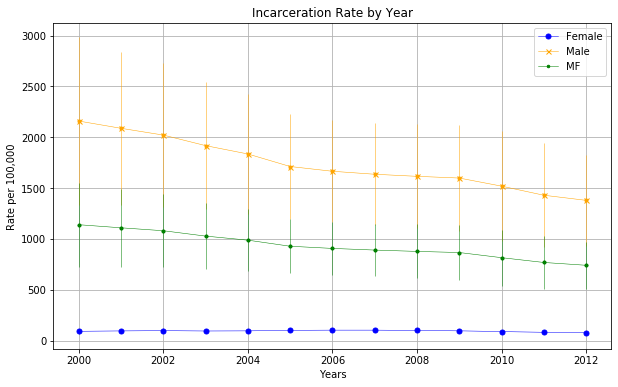

In [127]:

fig, ax = plt.subplots(figsize=(10,6))

x_axis = mean_sex_df["Year"].tolist()

female_mean = mean_sex_df["Female"].tolist()
male_mean = mean_sex_df["Male"].tolist()
mf_mean = mean_sex_df["MF"].tolist()

female_err = sem_sex_df["Female"].tolist()
male_err = sem_sex_df["Male"].tolist()
mf_err = sem_sex_df["MF"].tolist()
    
plt.plot( x_axis, female_mean , label='Female', marker='o', markerfacecolor=clr['Female'][1], markersize=5, color=clr['Female'][1], linewidth=0.5)
plt.plot( x_axis, male_mean, marker='x', label='Male',markerfacecolor=clr['Male'][1], markersize=5, color=clr['Male'][1], linewidth=0.5)
plt.plot( x_axis, mf_mean, marker='.', label='MF',markerfacecolor=clr['MF'][1], markersize=5, color=clr['MF'][1], linewidth=0.5)
    
ax.errorbar(x_axis, female_mean, female_err, color=clr['Female'][1], fmt=".", linewidth=0.5)
ax.errorbar(x_axis, male_mean, male_err, color=clr['Male'][1], fmt=".", linewidth=0.5)
ax.errorbar(x_axis, mf_mean, mf_err, color=clr['MF'][1], fmt=".", linewidth=0.5)

plt.title("Incarceration Rate by Year")
plt.xlabel("Years")
plt.ylabel("Rate per 100,000")
plt.grid()
plt.legend()
plt.show()



In [45]:
byRace_df = imprisonment_df.groupby(['Year', "Characteristic"]).mean()
byRace_df.head()

Rate per 100,000     Count
Year Characteristic                                         
2000 Black, non-Hispanic                    2769.0   52510.5
     Hispanic                                919.0   24272.5
     Other race, non-Hispanic                825.5    7686.5
     Total                                   791.0  218896.0
     Total - Black, non-Hispanic            2732.0  104880.0

In [57]:
df = pd.pivot_table(byRace_df, index=['Year'], columns = "Characteristic")
race_df = df["Rate per 100,000"]
mean_race_df = race_df.reset_index()
mean_race_df.head()

Characteristic,Year,"Black, non-Hispanic",Hispanic,"Other race, non-Hispanic",Total,"Total - Black, non-Hispanic",Total - Female,Total - Hispanic,Total - Male,"Total - Other race, non-Hispanic","Total - White, non-Hispanic","White, non-Hispanic"
0,2000,2769.0,919.0,825.5,791.0,2732.0,67.0,1004.0,1478.0,826.0,345.0,340.0
1,2001,2595.5,928.0,831.0,777.0,2577.0,71.0,1012.0,1447.0,831.0,349.0,343.5
2,2002,2464.0,935.5,802.5,766.0,2461.0,74.0,1017.0,1422.0,805.0,353.0,347.5
3,2003,2236.5,930.5,797.0,750.0,2241.0,73.0,1007.0,1388.0,800.0,340.0,334.5
4,2004,2119.0,906.0,788.0,707.0,2134.0,73.0,974.0,1305.0,792.0,331.0,325.0


In [51]:
err_byRace_df = imprisonment_df.groupby(['Year', "Characteristic"]).sem()
err_byRace_df.head()

Count  Rate per 100,000  Sex
Year Characteristic                                             
2000 Black, non-Hispanic          49010.5            2589.0  NaN
     Hispanic                     22676.5             846.0  NaN
     Other race, non-Hispanic      6817.5             731.5  NaN
     Total                            NaN               NaN  NaN
     Total - Black, non-Hispanic      NaN               NaN  NaN

In [52]:
df = pd.pivot_table(err_byRace_df, index=['Year'], columns = "Characteristic")
err_df = df["Rate per 100,000"]
race_err_df = err_df.reset_index()
race_err_df.head()

Characteristic,Year,"Black, non-Hispanic",Hispanic,"Other race, non-Hispanic","White, non-Hispanic"
0,2000,2589.0,846.0,731.5,299.0
1,2001,2414.5,853.0,727.0,300.5
2,2002,2287.0,854.5,694.5,299.5
3,2003,2066.5,846.5,703.0,285.5
4,2004,1953.0,817.0,691.0,273.0


In [58]:
mean_race_df['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012], dtype=int64)

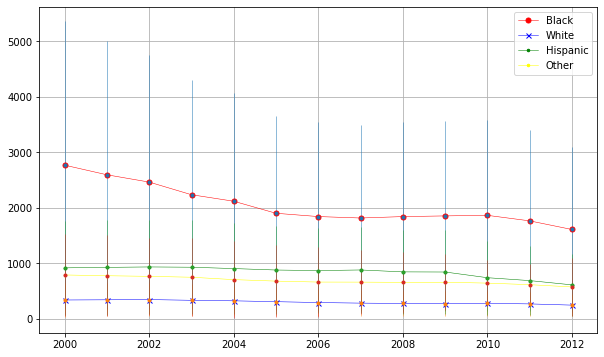

In [108]:
fig, ax = plt.subplots(figsize=(10,6))
x_axis = race_mean_rate_df["Year"].tolist()
black_mean = mean_race_df["Black, non-Hispanic"].tolist()
white_mean = mean_race_df["White, non-Hispanic"].tolist()
hispanic_mean = mean_race_df["Hispanic"].tolist()
other_mean = mean_race_df["Total"].tolist()

black_err = race_err_df["Black, non-Hispanic"].tolist()
white_err = race_err_df["White, non-Hispanic"].tolist()
hispanic_err = race_err_df["Hispanic"].tolist()
other_err = race_err_df["Other race, non-Hispanic"].tolist()

plt.plot( x_axis, black_mean, label='Black', marker='o', color='red', markerfacecolor='red', markersize=5, linewidth=0.5)
plt.plot( x_axis, white_mean, label='White', marker='x', color='blue',markerfacecolor='blue', markersize=5, linewidth=0.5)
plt.plot( x_axis, hispanic_mean, label='Hispanic', marker='.', color='green', markerfacecolor='green', markersize=5, linewidth=0.5)
plt.plot( x_axis, other_mean, label='Other', marker='.', color='yellow', markerfacecolor='yellow', markersize=5, linewidth=0.5)
         
ax.errorbar(x_axis, black_mean, black_err, fmt=".", linewidth=0.5)
ax.errorbar(x_axis, white_mean, white_err, fmt=".", linewidth=0.5)
ax.errorbar(x_axis, hispanic_mean, hispanic_err, fmt=".", linewidth=0.5)
ax.errorbar(x_axis, other_mean, other_err, fmt=".", linewidth=0.5)

plt.grid()
plt.legend()
plt.show()

In [119]:
row_series = mean_race_df.sum(axis=0, skipna = True)
row_sum = row_series.sum()
row_series

Characteristic
Year                                26078.0
Black, non-Hispanic                 26684.0
Hispanic                            10984.0
Other race, non-Hispanic             9167.0
Total                                8949.0
Total - Black, non-Hispanic         26765.0
Total - Female                        945.0
Total - Hispanic                    11737.0
Total - Male                        16519.0
Total - Other race, non-Hispanic     9230.0
Total - White, non-Hispanic          3999.0
White, non-Hispanic                  3927.0
dtype: float64

In [120]:
col_series = mean_race_df.sum(axis=1, skipna = True)
col_series

0     14096.5
1     13763.0
2     13449.5
3     12900.5
4     12458.0
5     11837.5
6     11602.5
7     11448.5
8     11321.0
9     11219.0
10    10736.5
11    10232.0
12     9919.5
dtype: float64

In [123]:
np.divide((col_series[0] * row_series[0]), row_sum )

2371.9127587363855

In [ ]:
stats